# Features - Simplification
Documentation Link: https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
x, y, z = sp.symbols('x y z')

## [`simplify`](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#simplify)

In [3]:
display(sp.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))
display(sp.simplify(sp.gamma(x)/sp.gamma(x - 2)))

## [Polynomial/Rational Function Simplification](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#polynomial-rational-function-simplification)

### **`expand`**

In [4]:
print(sp.expand((x-4)**2*(x+2)*(x-1)**3 +(x+2)*(x-1)**2))
sp.expand((x-4)**2*(x+2)*(x-1)**3 +(x+2)*(x-1)**2)

x**6 - 9*x**5 + 21*x**4 + 14*x**3 - 90*x**2 + 93*x - 30


### **`factor`**

In [5]:
sp.factor(x**6 - 9*x**5 + 21*x**4 + 14*x**3 - 90*x**2 + 93*x - 30)

In [6]:
sp.factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

### **`collect`**

In [7]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
display(expr)
collected_expr = sp.collect(expr, x)
display(collected_expr, collected_expr.coeff(x, 2))

### **`cancel`**

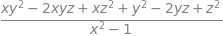

'cancel'

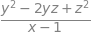

'factor'

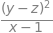

In [8]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
display(expr, 'cancel', sp.cancel(expr), 'factor', sp.factor(expr))

### **`apart`** - Partial fraction

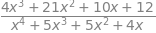

In [9]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
display(expr, sp.apart(expr))

## [Trigonometric Simplification](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#trigonometric-simplification)

In [10]:
display('inverse', sp.acos(x))
display(sp.cos(sp.acos(x)))
display(sp.asin(1))

'inverse'

### **`trigsimp`** - Simplification of Trigonometic identities

In [14]:
display(sp.trigsimp(sp.sin(x)**2 + sp.cos(x)**2))
display(sp.trigsimp(sp.sin(x)**4 - 2*sp.cos(x)**2*sp.sin(x)**2 + sp.cos(x)**4))
display(sp.trigsimp(sp.sin(x)*sp.tan(x)/sp.sec(x)))

display(sp.trigsimp(sp.cosh(x)**2 + sp.sinh(x)**2))
display(sp.trigsimp(sp.cosh(x)/sp.sinh(x)))
display(sp.trigsimp(sp.sin(x)*sp.cos(y) + sp.sin(y)*sp.cos(x)))

### **`expand_trig`**

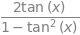

In [13]:
display(sp.expand_trig(sp.sin(x + y)))
display(sp.expand_trig(sp.tan(2*x)))

## [Powers](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#powers)

| **Identity**            | **Sufficient conditions to hold**         | **Counterexample when conditions are not met**                 | **Important consequences**                                   |
|--------------------------|-------------------------------------------|-----------------------------------------------------------------|------------------------------------------------------------|
| $x^ax^b = x^{a + b}$     | Always true                               | None                                                            | None                                                       |
| $x^ay^a = (xy)^a$        | $x, y \geq 0$, and $x, y \geq 0$          | $(-1)^{1/2}(-1)^{1/2} \neq (-1\cdot-1)^{1/2}$               | $\sqrt{x}\sqrt{y} \neq \sqrt{xy}$ in general               |
| $(x^a)^b = x^{ab}$       | $b \in \mathbb{Z}$                       | $\{((-1)^2)\}^{1/2} \neq (-1)^{2\cdot1/2}$                 | $\sqrt{x^2}\neq x$ and $\sqrt{\frac{1}{x}}\neq\frac{1}{\sqrt{x}}$ in general |

This is important to remember, because by default, SymPy will not perform simplifications if they are not true in general.

The simplification in sympy is not applied if it is not true under the given assumptions. However, this can be manually overridden with `force=True`.

In [15]:
x, y = sp.symbols('x y', positive=True)
a, b = sp.symbols('a b', real=True)
z, t, c = sp.symbols('z t c')

In [17]:
display(sp.sqrt(x) == x**sp.Rational(1, 2), sp.sqrt(x) == x**0.5)

True

False

### **`powsimp`**

In [27]:
display(sp.powsimp(t**c *z**c), sp.powsimp(t**c *z**c, force=True))
display((z*t)**2, sp.powsimp((z*t)**2), 
        sp.sqrt(x*y), sp.powsimp(sp.sqrt(x*y)))

### **`expand_power_exp` / `expand_power_base`**

In [30]:
display('expand_power_exp', x**(a+b), sp.expand_power_exp(x**(a + b)))
display('expand_power_base', (x*y)**a, sp.expand_power_base((x*y)**a))
display(sp.expand_power_base((z*t)**c), sp.expand_power_base((z*t)**c, force=True))


'expand_power_exp'

'expand_power_base'

### **`powdenest`**

In [33]:
display((x**a)**b, sp.powdenest((x**a)**b))
display(sp.powdenest((z**a)**b), sp.powdenest((z**a)**b, force=True))


## [Exponentials and Logarithms](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#exponentials-and-logarithms)

In sympy, **`ln`** is displayed as $log$ automatically.

Logarithms have similar issues as powers. There are two main identities
1. $\log{(xy)} = \log{(x)} + \log{(y)}$
2. $\log{(x^n)} = n\log{(x)}$

Neither identity is true for arbitrary complex $x$ and $y$, due to the branch cut in the complex plane for the complex logarithm. However, sufficient conditions for the identities to hold are if $x$ and $y$ are positive and $n$ is real.

In [37]:
x, y = sp.symbols('x y', positive=True)
n = sp.symbols('n', real=True)

In [45]:
display(sp.ln(x), sp.ln(x) == sp.log(x), sp.log(x, 10))

True

### **`expand_log`**

In [48]:
display(sp.expand_log(sp.log(x*y)),
sp.expand_log(sp.log(x/y)),
sp.expand_log(sp.log(x**2)),
sp.expand_log(sp.log(x**n)),
sp.expand_log(sp.log(z*t)))

In [ ]:
display(sp.expand_log(sp.log(z**2)), sp.expand_log(sp.log(z**2), force=True))
# force option to ignore assumptions

### **`logcombine`**

In [50]:
display(sp.logcombine(sp.log(x) + sp.log(y)),
sp.logcombine(n*sp.log(x)),
sp.logcombine(n*sp.log(z)),
sp.logcombine(n*sp.log(z), force=True))

## [Special Functions](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#special-functions)



* **factorial (`factorial`):** $\quad n!= 1\cdot2\cdots(n - 1)\cdot n$
* **binomial (`binomial`):** $\quad {}^nC_k \quad$ or "$n$ choose $k$".
* **gamma (`gamma`):** $\quad \Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt$

* **generalized hypergeometric function (`hyper`):** `hyper([a_1, ..., a_p], [b_1, ..., b_q], z)` represents ${}_pF_q\left(\begin{matrix} a_1, \cdots, a_p \\ b_1, \cdots, b_q \end{matrix} \middle| z \right)$. The most common case is ${}_2F_1$, which is often referred to as the ordinary hypergeometric function.

In [52]:
x, y, z = sp.symbols('x y z')
k, m, n = sp.symbols('k m n')

In [55]:
sp.factorial(n)

In [56]:
sp.binomial(n, k)

In [57]:
sp.gamma(z)

In [58]:
sp.hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

### **`rewrite`**

In [59]:
display(sp.tan(x).rewrite(sp.cos),
sp.factorial(x).rewrite(sp.gamma))

See more in [Advanced Expression Manipulations notebook](sympy_features_adv_expr_manipulations_skp.ipynb).

### **`expand_func`**

In [60]:
sp.expand_func(sp.gamma(x+3))

### **`hyperexpand`**
To rewrite hyper in terms of more standard functions, use `hyperexpand()`. `hyperexpand()` also works on the more general Meijer G-function (see its documentation for more information).

In [62]:
display(sp.hyperexpand(sp.hyper([1,1], [2], z)))
expr = sp.meijerg([[1],[1]], [[1],[]], -z)
display(expr, sp.hyperexpand(expr))

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

### **`combsimp`**
To simplify combinatorial expressions use this.

In [63]:
n, k = sp.symbols('n k', integer=True)
display(sp.combsimp(sp.factorial(n)/sp.factorial(n-3)),
sp.combsimp(sp.binomial(n+1, k+1)/sp.binomial(n, k)))

### **`gammasimp`**
To simplify expressions with gamma functions or combinatorial functions with non-integer argument use this.

In [64]:
sp.gammasimp(sp.gamma(x)*sp.gamma(1-x))

## [Example: Continued Fractions](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#example-continued-fractions)

In [ ]:
# continue